In [48]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import sympy as sy
sy.init_printing() 

In [49]:
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# <font face="gotham" color="purple"> Eigenvalue and Eigenvector

An  <font face="gotham" color="red">eigenvector</font> of an $n \times n$ matrix $A$ is a nonzero vector $x$ such that $Ax = \lambda x$ for some scalar $\lambda$. A scalar $\lambda$ is called an  <font face="gotham" color="red">eigenvalue</font> of $A$ if there is a nontrivial solution $x$ of $Ax = \lambda x$, such an $x$ is called an eigenvector corresponding to $\lambda$. 

Rewrite the equation,

$$
(A-\lambda I)x = 0
$$

Since the eigenvector should be a nonzero vector, which means: 

1. The column or rows of $(A-\lambda I)$ are linearly dependent
2. $(A-\lambda I)$ is not full rank, $Rank(A)<n$.
3. $(A-\lambda I)$ is not invertible.
4. $\text{det}(A-\lambda I)=0$, which is called <font face="gotham" color="red">characteristic equation</font>.

Consider a matrix $A$

$$
A=\left[\matrix{1 & 0 & 0\cr 1 & 0 & 1\cr 2 & -2 & 3}\right]
$$

Set up the characteristic equation,

$$
\text{det}\left(
\left[\matrix{1 & 0 & 0\cr 1 & 0 & 1\cr 2 & -2 & 3}\right]-
\lambda
\left[\matrix{1 & 0 & 0\cr 0 & 1 & 0\cr 0 & 0 & 1}\right]
\right)=0
$$

Use SymPy ```charpoly``` and ```factor```, we can have straightforward solutions for eigenvalues.

In [50]:
lamda = sy.symbols('lamda') # 'lamda' withtout 'b' is reserved for SymPy, lambda is reserved for Python

```charpoly``` returns characteristic equation.

In [51]:
A = sy.Matrix([[1, 0, 0], [1, 0, 1], [2, -2, 3]])
p = A.charpoly(lamda); 
print(p)

PurePoly(lamda**3 - 4*lamda**2 + 5*lamda - 2, lamda, domain='ZZ')


Factor the polynomial such that we can see the solution.

In [52]:
sy.factor(p)

From the factored characteristic polynomial, we get the eigenvalue, and $\lambda =1$ has algebraic multiplicity of $2$, because there are two $(\lambda-1)$. If not factored, we can use ```solve``` instead.

In [53]:
sy.solve(p,lamda)

Or use ```eigenvals``` directly.

In [55]:
sy.matrices.MatrixEigen.eigenvals(A)

AttributeError: module 'sympy.matrices' has no attribute 'MatrixEigen'

To find the eigenvector corresponding to $\lambda$, we substitute the eigenvalues back into $(A-\lambda I)x=0$ and solve it. Construct augmented matrix with $\lambda =1$ and perform rref.

In [56]:
(A - 1*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

⎛⎡1  -1  1  0⎤      ⎞
⎜⎢           ⎥      ⎟
⎜⎢0  0   0  0⎥, (0,)⎟
⎜⎢           ⎥      ⎟
⎝⎣0  0   0  0⎦      ⎠

The null space is the solution set of the linear system.

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
x_2-x_3 \\ x_2 \\ x_3
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1 \\ 1 \\ 0
\end{matrix}
\right]
+x_3\left[
\begin{matrix}
-1 \\ 0 \\ 1
\end{matrix}
\right]
$$

This is called <font face="gotham" color="red"> eigenspace </font> for $\lambda = 1$, which is a subspace in $\mathbb{R}^3$. All eigenvectors are inside the eigenspace.

We can proceed with $\lambda = 2$ as well.

In [57]:
(A - 2*sy.eye(3)).row_join(sy.zeros(3,1)).rref()

⎛⎡1  0   0    0⎤        ⎞
⎜⎢             ⎥        ⎟
⎜⎢0  1  -1/2  0⎥, (0, 1)⎟
⎜⎢             ⎥        ⎟
⎝⎣0  0   0    0⎦        ⎠

The null space is the solution set of the linear system.

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
0\\ \frac{1}{2}x_3\\ x_3
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
0 \\ \frac{1}{2} \\ 1
\end{matrix}
\right]
$$

To avoid troubles of solving back and forth, SymPy has ```eigenvects``` to calcuate eigenvalues and eigenspaces (basis of eigenspace).

In [58]:
eig = sy.matrices.MatrixEigen.eigenvects(A)
eig

AttributeError: module 'sympy.matrices' has no attribute 'MatrixEigen'

To clarify what we just get, write

In [59]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[0][0], eig[0][1], eig[0][2]))

NameError: name 'eig' is not defined

In [60]:
print('Eigenvalue = {0}, Multiplicity = {1}, Eigenspace = {2}'.format(eig[1][0], eig[1][1], eig[1][2]))

NameError: name 'eig' is not defined

## <font face="gotham" color="purple"> NumPy Functions for Eigenvalues and Eigenspace

Convert SymPy matrix into NumPy float array.

In [61]:
A = np.array(A).astype(float); A

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  1.],
       [ 2., -2.,  3.]])

```.eigvals()``` and ```.eig(A)``` are handy functions for eigenvalues and eigenvectors.

In [62]:
np.linalg.eigvals(A) 

array([2., 1., 1.])

In [63]:
np.linalg.eig(A) #return both eigenvalues and eigenvectors

(array([2., 1., 1.]),
 array([[ 0.   ,  0.   ,  0.408],
        [ 0.447,  0.707, -0.408],
        [ 0.894,  0.707, -0.816]]))

## <font face="gotham" color="purple"> An Example

Consider a matrix $A$

In [65]:
A = sy.Matrix([[-4, -4, 20, -8, -1], 
               [14, 12, 46, 18, 2], 
               [6, 4, -18, 8, 1], 
               [11, 7, -37, 17, 2], 
               [18, 12, -60, 24, 5]])
print(A)

Matrix([[-4, -4, 20, -8, -1], [14, 12, 46, 18, 2], [6, 4, -18, 8, 1], [11, 7, -37, 17, 2], [18, 12, -60, 24, 5]])


Find eigenvalues.

In [66]:
eig = sy.matrices.MatrixEigen.eigenvals(A)
eig

AttributeError: module 'sympy.matrices' has no attribute 'MatrixEigen'

Or use NumPy functions, show the eigenvalues.

In [67]:
A = np.array(A)
A = A.astype(float)
eigval, eigvec = np.linalg.eig(A)
eigval

array([ 21.69, -16.69,   3.  ,   2.  ,   2.  ])

And corresponding eigenvectors.

In [68]:
eigvec

array([[-0.124, -0.224,  0.   , -0.039,  0.611],
       [ 0.886, -0.543, -0.894, -0.216, -0.149],
       [ 0.124,  0.224,  0.   ,  0.   , -0.   ],
       [ 0.216,  0.392,  0.447,  0.255, -0.462],
       [ 0.371,  0.672, -0.   , -0.942,  0.625]])

## <font face="gotham" color="purple"> A Visualization Example

Let 

$$
A= 
\left[
\begin{matrix}
1 & 6\\ 
5 & 2
\end{matrix}
\right]
$$

find the eigenvalues and vectors, then visualize in $\mathbb{R}^2$

Use characteristic equation $|A - \lambda I|=0$

$$
\left|
\left[
\begin{matrix}
1 & 6\\ 
5 & 2
\end{matrix}
\right]
-
\left[
\begin{matrix}
\lambda & 0\\ 
0 & \lambda
\end{matrix}
\right]\right|=0
$$

In [71]:
lamda = sy.symbols('lamda')
A = sy.Matrix([[1,6],[5,2]])
I = sy.eye(2)
print(I)

Matrix([[1, 0], [0, 1]])


In [70]:
A - lamda*I

⎡1 - λ    6  ⎤
⎢            ⎥
⎣  5    2 - λ⎦

In [73]:
p = A.charpoly(lamda);
print(p)

PurePoly(lamda**2 - 3*lamda - 28, lamda, domain='ZZ')


In [74]:
sy.factor(p)

There are two eigenvalues: $7$ and $4$. Next we calculate eigenvectors.

In [75]:
(A - 7*sy.eye(2)).row_join(sy.zeros(2,1)).rref()

⎛⎡1  -1  0⎤      ⎞
⎜⎢        ⎥, (0,)⎟
⎝⎣0  0   0⎦      ⎠

The eigenspace for $\lambda = 7$ is 

$$
\left[
\begin{matrix}
x_1\\
x_2
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
1\\
1
\end{matrix}
\right]
$$

Any vector is eigenspace as long as $x \neq 0$ is an eigenvector. Let's find out eigenspace for $\lambda = 4$.

In [76]:
(A + 4*sy.eye(2)).row_join(sy.zeros(2,1)).rref()

⎛⎡1  6/5  0⎤      ⎞
⎜⎢         ⎥, (0,)⎟
⎝⎣0   0   0⎦      ⎠

The eigenspace for $\lambda = -4$ is 

$$
\left[
\begin{matrix}
x_1\\
x_2
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
-\frac{6}{5}\\
1
\end{matrix}
\right]
$$

Let's plot both eigenvectors as $(1, 1)$ and $(-6/5, 1)$ and multiples with eigenvalues.

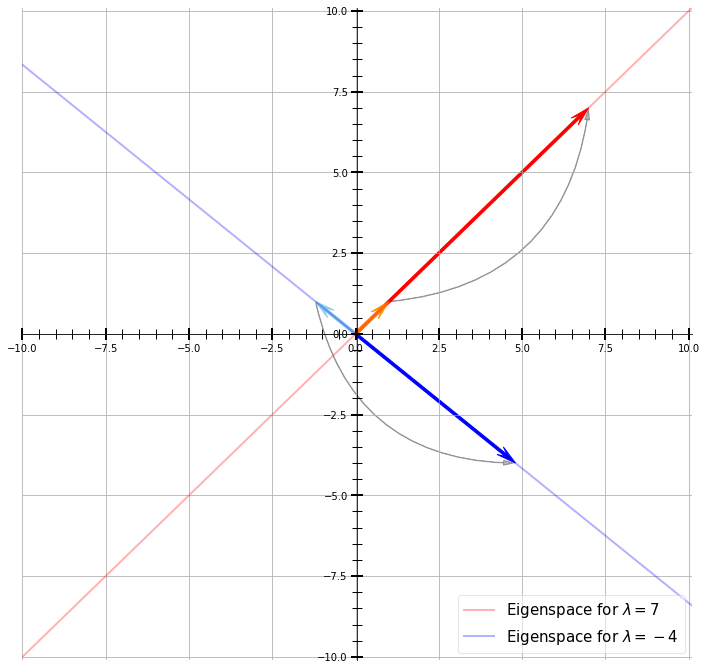

In [77]:
fig, ax = plt.subplots(figsize = (12, 12))
arrows = np.array([ [[0,0,1,1]],
                  [[0,0,-6/5,1]],
                  [[0,0,7,7]],
                  [[0,0,24/5,-4]] ])
colors = ['darkorange','skyblue','r','b']
for i in range(arrows.shape[0]):
    X,Y,U,V = zip(*arrows[i,:,:])
    ax.arrow(X[0], Y[0], U[0],V[0], color = colors[i], width = .08, 
             length_includes_head = True,
             head_width = .3, # default: 3*width
             head_length = .6,
             overhang = .4, zorder = -i)

################################### Eigenspace #################################
x = np.arange(-10, 10.6, .5)
y = x
ax.plot(x, y, lw = 2, color = 'red', alpha = .3, label = 'Eigenspace for $\lambda = 7$')

x = np.arange(-10, 10.6, .5)
y = -5/6*x
ax.plot(x, y, lw = 2, color = 'blue', alpha = .3,  label = 'Eigenspace for $\lambda = -4$')

######################## Annotation Arrows ################################

style="Simple, tail_width=0.5, head_width=5, head_length=10"
kw = dict(arrowstyle=style, color="k")

a = mpl.patches.FancyArrowPatch((1,1), (7,7),connectionstyle="arc3,rad=.4", **kw, alpha = .3)
plt.gca().add_patch(a)

a = mpl.patches.FancyArrowPatch((-6/5,1), (24/5,-4),connectionstyle="arc3,rad=.4", **kw, alpha = .3)
plt.gca().add_patch(a)

############################ Legend ###############################

leg = ax.legend(fontsize = 15, loc = 'lower right')
leg.get_frame().set_alpha(0.5)

###################### Axis, Spines, Ticks ##########################
ax.axis([-10, 10.1, -10.1, 10.1])
ax.spines['left'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('center')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.minorticks_on()
ax.tick_params(axis = 'both', direction = 'inout', length=12, width=2, which='major')
ax.tick_params(axis = 'both', direction = 'inout', length=10, width=1, which='minor')
ax.grid()
plt.show()

# <font face="gotham" color="purple"> Geometric Intuition

Eigenvector has a special property that preserves the pointing direction after linear transformation.To illustrate the idea, let's plot a 'circle' and arrows touching edges of circle.

Start from one arrow. If you want to draw a smoother circle, you can use parametric function rather two quadratic functions, because cicle can't be draw with one-to-one mapping.But this is not the main issue, we will live with that.

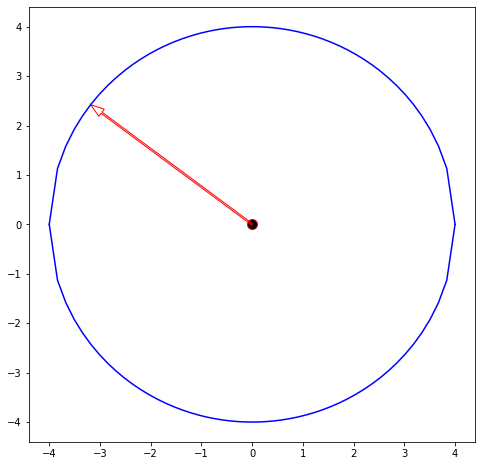

In [78]:
x = np.linspace(-4, 4)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y_u, color = 'b')
ax.plot(x, y_d, color = 'b')

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

ax.arrow(0, 0, x[5], y_u[5], head_width = .18, 
         head_length= .27, length_includes_head = True, 
         width = .03, ec = 'r', fc = 'None')
plt.show()

Now, the same 'circle', but more arrows.

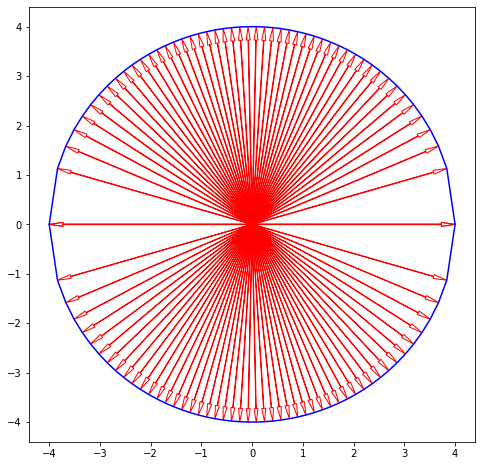

In [79]:
x = np.linspace(-4, 4, 50)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y_u, color = 'b')
ax.plot(x, y_d, color = 'b')

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

for i in range(len(x)):
    ax.arrow(0, 0, x[i], y_u[i], head_width = .08, 
             head_length= .27, length_includes_head = True,
             width = .01, ec = 'r', fc = 'None')
    ax.arrow(0, 0, x[i], y_d[i], head_width = .08, 
             head_length= .27, length_includes_head = True, 
             width = .008, ec = 'r', fc = 'None')

Now we will perform linear transformation on the circle. Technically, we can only transform the points - the arrow tip - that we specify on the circle.

We create a matrix

$$
A = 
\left[\begin{matrix}
3 & -2\\
1 & 0
\end{matrix}\right]
$$

Align all the coordinates into two matrices for upper and lower half respectively. 

$$
V_u = 
\left[\begin{matrix}
x_1^u & x_2^u & \ldots & x_m^u\\
y_1^u & y_2^u & \ldots & y_m^u
\end{matrix}\right]\\
V_d = 
\left[\begin{matrix}
x_1^d & x_2^d & \ldots & x_m^d\\
y_1^d & y_2^d & \ldots & y_m^d
\end{matrix}\right]
$$

The matrix multiplication $AV_u$ and $AV_d$ are linear transformation of the circle.

In [80]:
A = np.array([[3, -2], [1, 0]])

Vu = np.hstack((x[:, np.newaxis], y_u[:, np.newaxis]))
AV_u = (A@Vu.T)

Vd = np.hstack((x[:, np.newaxis], y_d[:, np.newaxis]))
AV_d = (A@Vd.T)

The circle becomes an ellipse. However, if you watch closely, you will find there are some arrows still pointing the same direction after linear transformation.

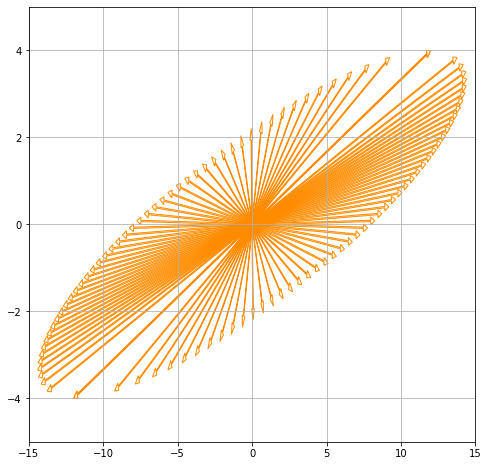

In [83]:
fig, ax = plt.subplots(figsize = (8, 8))

for i in range(len(x)):
    ax.arrow(0, 0, AV_u[0, i], AV_u[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')
    ax.arrow(0, 0, AV_d[0, i], AV_d[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')    
ax.axis([-15, 15, -5, 5])
ax.grid()
plt.show()

We can plot the cirle and ellipse together, those vectors pointing the same direction before and after the linear transformation are eigenvector of $A$, eigenvalue is the length ratio between them.

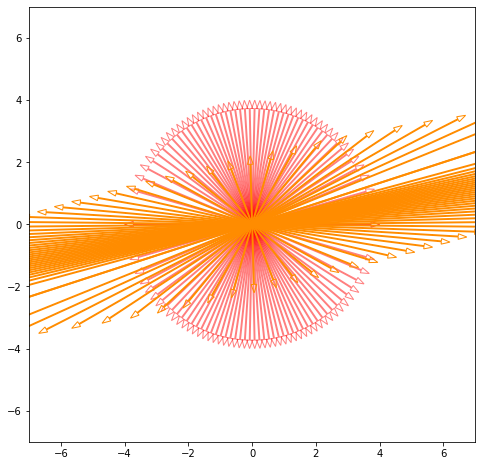

In [84]:
k = 50
x = np.linspace(-4, 4, k)
y_u = np.sqrt(16 - x**2)
y_d = -np.sqrt(16 - x**2)

fig, ax = plt.subplots(figsize = (8, 8))

ax.scatter(0, 0, s = 100, fc = 'k', ec = 'r')

for i in range(len(x)):
    ax.arrow(0, 0, x[i], y_u[i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'r', alpha = .5, fc = 'None')
    ax.arrow(0, 0, x[i], y_d[i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'r', alpha = .5, fc = 'None')

A = np.array([[3, -2], [1, 0]])

v = np.hstack((x[:, np.newaxis], y_u[:, np.newaxis]))
Av_1 = (A@v.T)

v = np.hstack((x[:, np.newaxis], y_d[:, np.newaxis]))
Av_2 = (A@v.T)

for i in range(len(x)):
    ax.arrow(0, 0, Av_1[0, i], Av_1[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')
    ax.arrow(0, 0, Av_2[0, i], Av_2[1, i], head_width = .18, 
             head_length= .27, length_includes_head = True, 
             width = .03, ec = 'darkorange', fc = 'None')    
n = 7
ax.axis([-n, n, -n, n])
plt.show()